# Titanic survived prediction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Would you have survived the sinking of the titanic ? 

This notebook is using Machine Learning library **sklearn** to make a model to predict whether you would have survived or not. 

Let's get fun :)

# Plan

## Data Import
* We have used the dataset titanic whic can found at the adress : https://www.kaggle.com/competitions/titanic/data
* To import he file we use function **read_csv** of the library **Pandas**
* The Data is import as **Pandas Data Frame**

## Exploratory analysis
* Here we get a look of our data 
* We looked at the missing values ​​and the types of the different variables in our dataset
* We looked at the different statistical information of the dataset such as the mean, the standard deviation, the mode, the quantiles, min, max values etc.
* We get a look of histogram of all dataset's variables (numeric variables and categorical).
* We get a look of a **pair plot** and a **heatmap** of the dataset with the library **seaborn**.
## Pre-processing
* Here we identify our target variable.
* We first eliminate the variables that will not be used for learning **name** and **ticket**.
* We then create two variables **X** and **y** which respectively contain the explanatory variables and the target variable, the variable **survived** here.
* Then thanks to the **train_test_split** function of sklearn we create a training set which represents **70%** and a test set which represents **30%**. We specify the **stratify** argument in this function so that the training and test data have the same class imbalance as the original dataset.
## Modeling
* Here we use models which are at the same time pipelines and which allow pre-processing operations such as the management of missing values, the encoding of categorical variables, the transformation of columns and the normalization of data.
## Model evaluation 
* To evaluate our model, several metrics are used here: F1 score, Accuracy, AUC.
* It is on these metrics that we will base ourselves to select the best model.
* Training each model generates  a **classification report**, a **confusion matrix** and the scores of **Accuracy** and **AUC** on the train and train sets. test.
* The different models we trained here are: **LogisticRegression**, **BaggingClassifier**, **RandomForestClassifier**, **KNeighborsClassifier**
## Model selection
* The selection of the best model is made on the basis of the model's **AUC** score on the test game. This metric is the most suitable for the evaluation of models because of the problem of class imbalance.
* Thus, the best model is the one with the best AUC score on the test set.
## Model save 
* To save the best model we use the **joblib** library

# Import library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Import data

In [3]:
data = pd.read_excel("titanic.xlsx")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Type of variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Data description

In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Count of missing values

In [6]:
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Drop unused variables

In [7]:
Titanic = data.drop(["name","ticket",'boat', 'home.dest','fare','body','cabin'],axis=1)

In [8]:
Titanic.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
embarked      2
dtype: int64

## List of numeric and categorial variables

In [9]:
numeric_features = (list(Titanic.select_dtypes("int64").columns),list(Titanic.select_dtypes("float64").columns))
categorical_features = list(Titanic.select_dtypes("object").columns)

print(f'Variables numériques :\n{numeric_features}\n\nVariables catégorielles:\n{categorical_features}')

Variables numériques :
(['pclass', 'survived', 'sibsp', 'parch'], ['age'])

Variables catégorielles:
['sex', 'embarked']


In [10]:
encoder = LabelEncoder()


for feature in categorical_features:
    Titanic[feature] = encoder.fit_transform(Titanic[feature])

Titanic.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,0,29.0000,0,0,2
1,1,1,1,0.9167,1,2,2
2,1,0,0,2.0000,1,2,2
3,1,0,1,30.0000,1,2,2
4,1,0,0,25.0000,1,2,2


In [11]:
Titanic

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,0,29.0000,0,0,2
1,1,1,1,0.9167,1,2,2
2,1,0,0,2.0000,1,2,2
3,1,0,1,30.0000,1,2,2
4,1,0,0,25.0000,1,2,2
...,...,...,...,...,...,...,...
1304,3,0,0,14.5000,1,0,0
1305,3,0,0,NaN,1,0,0
1306,3,0,1,26.5000,0,0,0
1307,3,0,1,27.0000,0,0,0


## Histograms of the variables

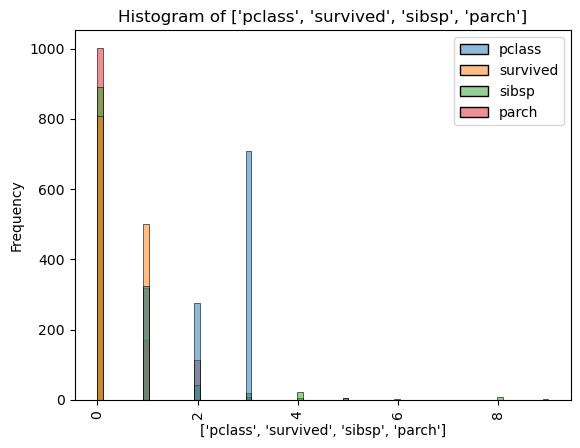

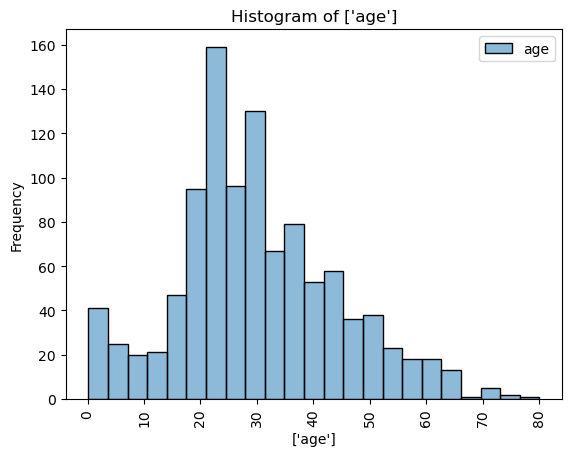

In [12]:
for feature in numeric_features:
    sns.histplot(Titanic[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

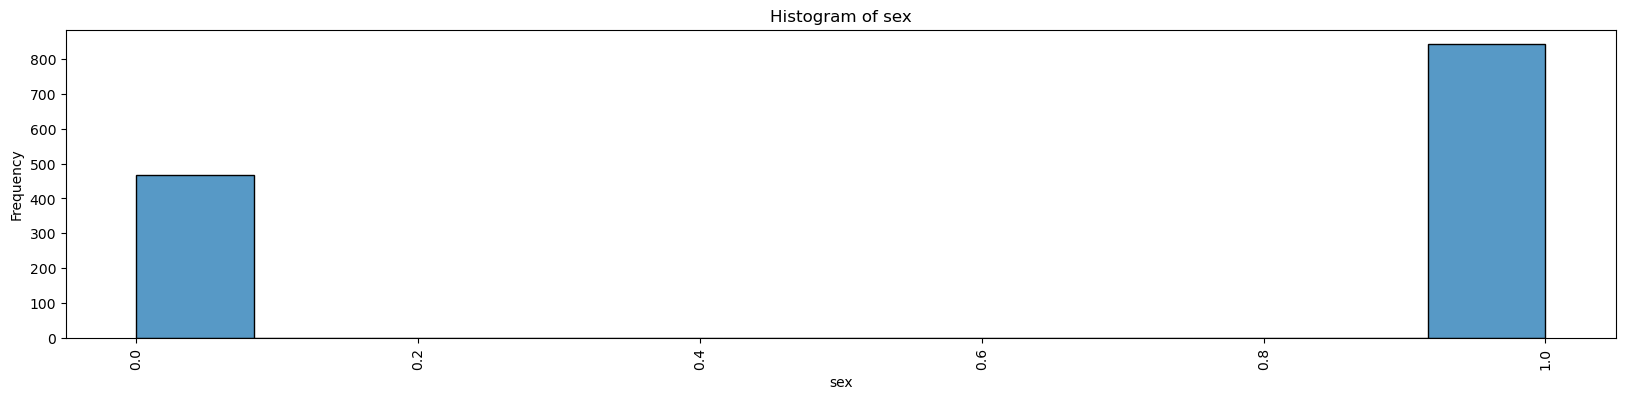

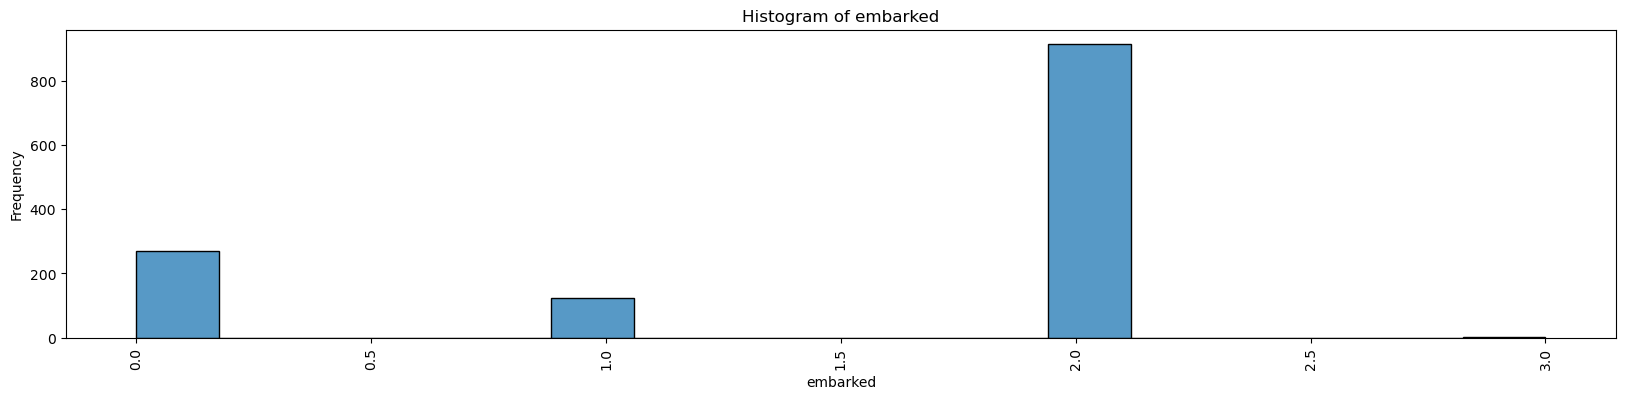

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(20,4))
    sns.histplot(Titanic[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

## Pair plot

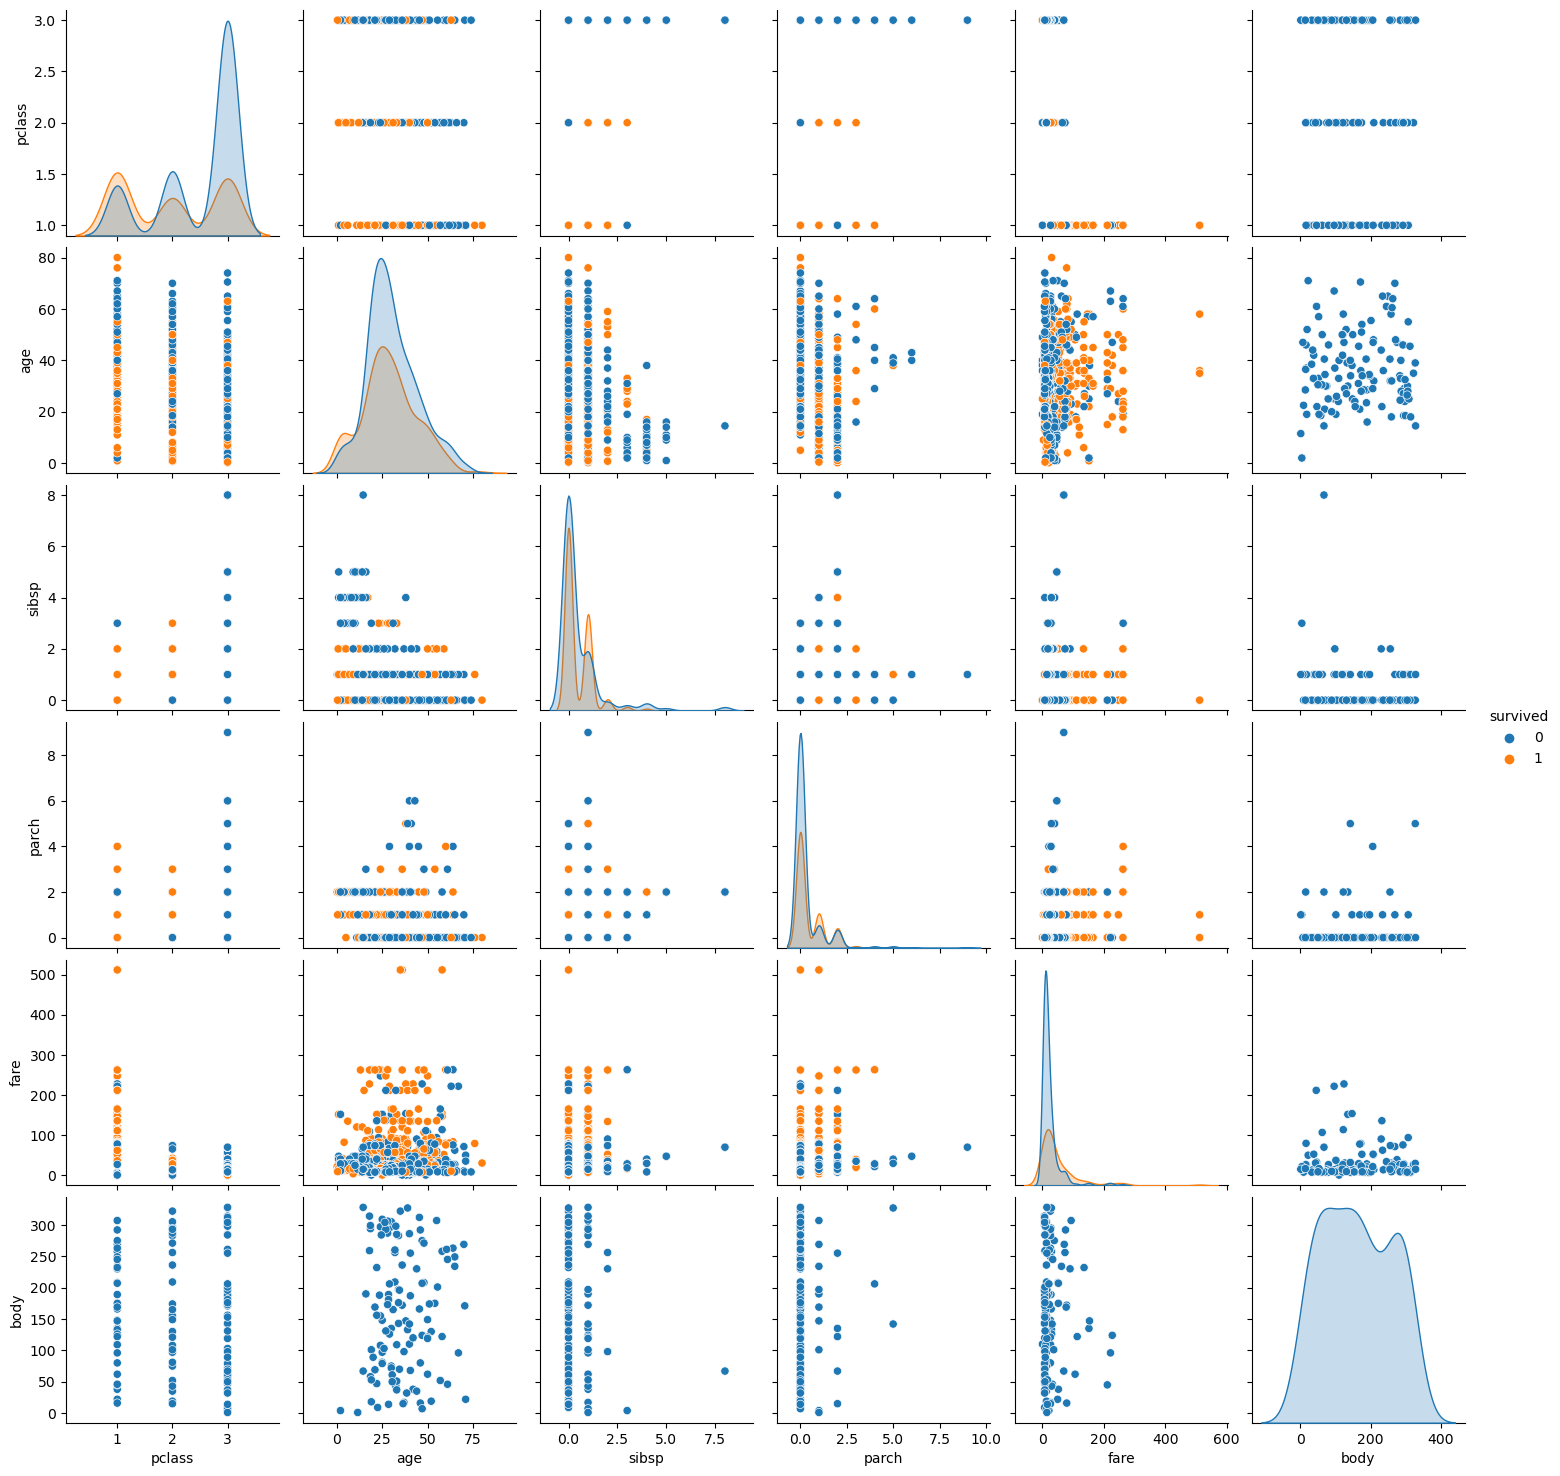

In [14]:
sns.pairplot(data, hue = 'survived')

## Heatmap

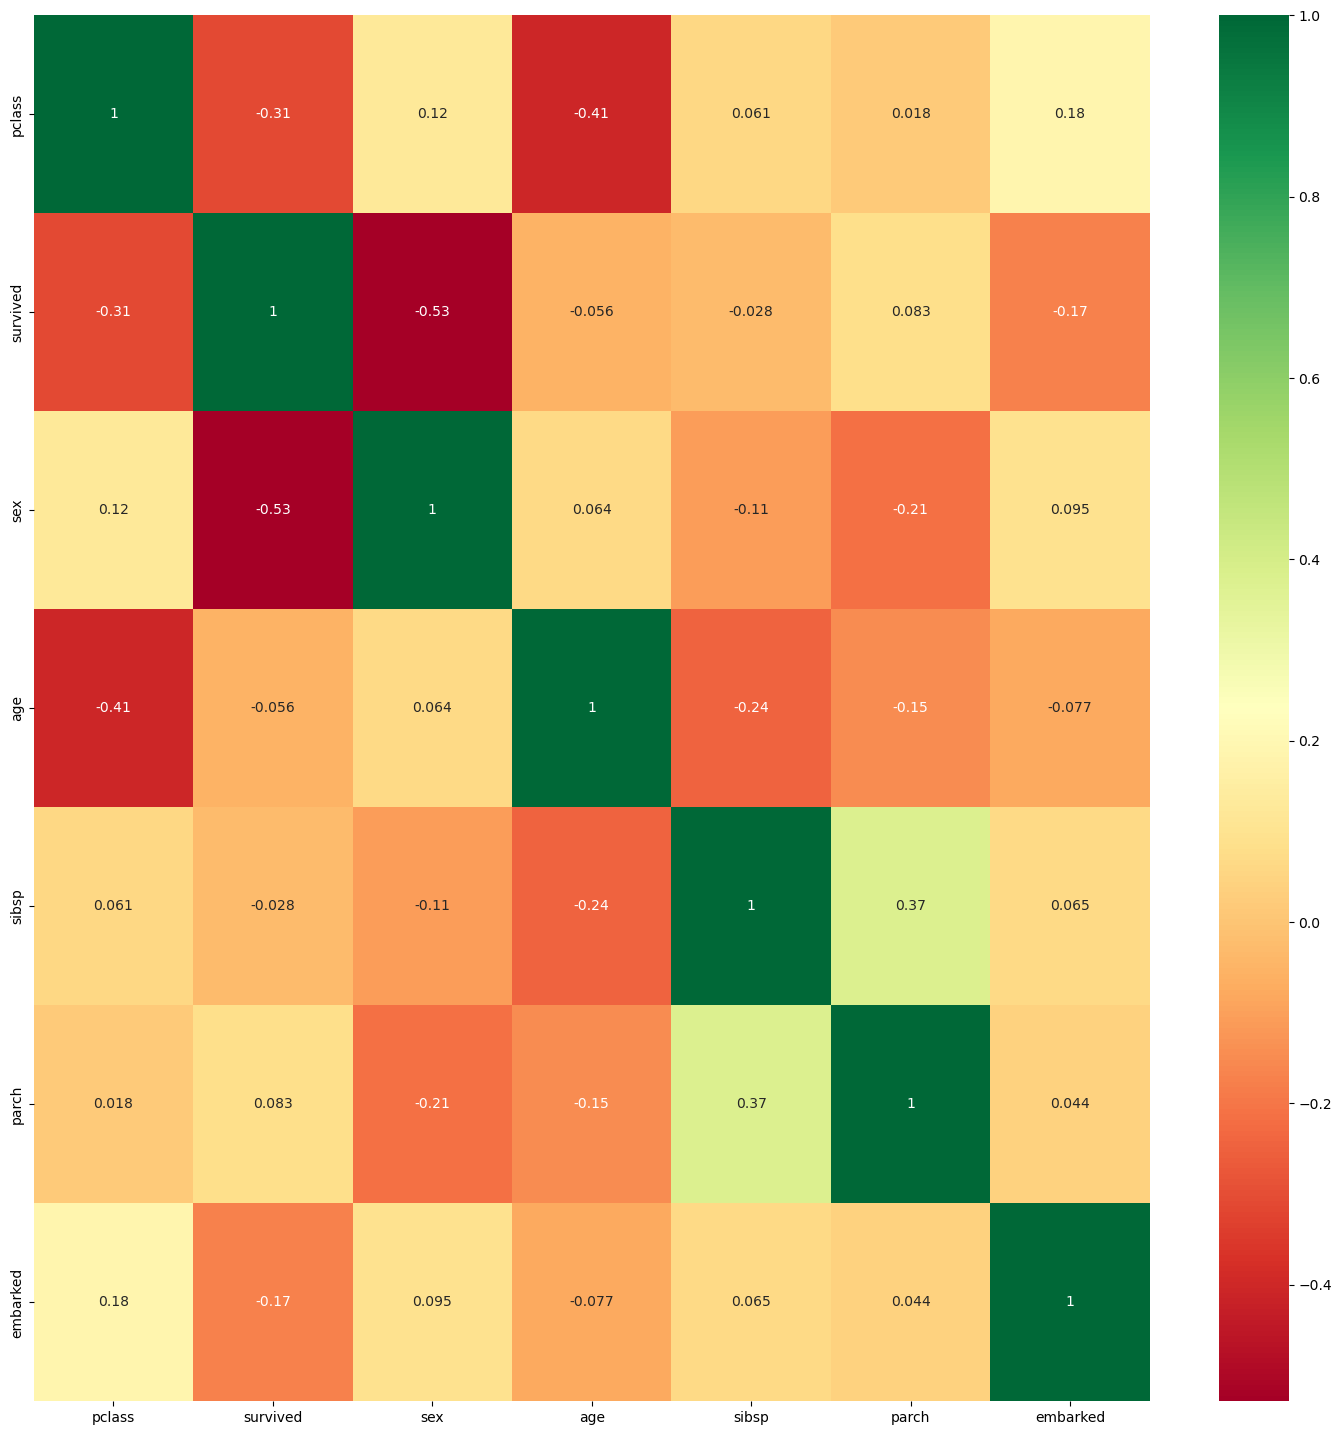

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap(Titanic.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Data Splitting

In [16]:
X = Titanic.drop(columns='survived')
y = Titanic['survived']

seed =123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=Titanic['survived'])

In [17]:
print("Train shape : ", X_train.shape, y_train.shape)
print("Test shape : ", X_test.shape, y_test.shape)
print("Survived : \t" , 'Train ', "0: ",(y_train == 0).sum(),  " 1 : ",(y_train== 1).sum() )
print("Survived : \t" , 'Test ', "0 : ", (y_test == 0).sum(), " 1 : ",(y_test == 1).sum() )

Train shape :  (916, 6) (916,)
Test shape :  (393, 6) (393,)
Survived : 	 Train  0:  566  1 :  350
Survived : 	 Test  0 :  243  1 :  150


In [18]:
X_train

,pclass,sex,age,sibsp,parch,embarked
1198,3,0,NaN,0,0,1
369,2,0,29.0,1,0,2
1103,3,1,2.0,4,1,2
544,2,1,34.0,1,0,2
1196,3,1,29.0,0,0,2
...,...,...,...,...,...,...
370,2,0,25.0,1,1,2
246,1,1,55.0,1,0,0
167,1,0,35.0,1,0,2
911,3,1,21.0,0,0,2


# Modeling

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 

## Pipeline 

In [19]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())
categorical_pipeline =  make_pipeline( KNNImputer(), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline,(['pclass',  'sibsp', 'parch'])),
                                       (categorical_pipeline,(['sex',  'embarked'])))

def make_n_train_model(model_send,X_train, X_test, y_train, y_test ):
    model = make_pipeline(preprocessor,model_send)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0),"\n \n")
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)),
          "\t Train AUC : ", roc_auc_score(y_train, model.predict(X_train)))
    
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)),
          "\t Test AUC : ", roc_auc_score(y_test, model.predict(X_test)),"\n \n")
    
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)),
         "\t Train AUC : ", roc_auc_score(y_train, model.predict(X_train)))
    
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)),
         "\t Test AUC : ", roc_auc_score(y_test, model.predict(X_test)),"\n \n")
    
    # Matrice de confusion
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20})  
    labels = ["Survived","Not Survived"]
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")
    return model

# Training

## LogisticRegression

The Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       243
           1       0.70      0.71      0.71       150

    accuracy                           0.77       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.77      0.77      0.77       393
 
 

Train Accuracy :  0.7860262008733624 	 Train AUC :  0.7701564866229177
Test Accuracy :  0.7735368956743003 	 Test AUC :  0.7620164609053498 
 

Train Accuracy :  0.7860262008733624 	 Train AUC :  0.7701564866229177
Test Accuracy :  0.7735368956743003 	 Test AUC :  0.7620164609053498 
 



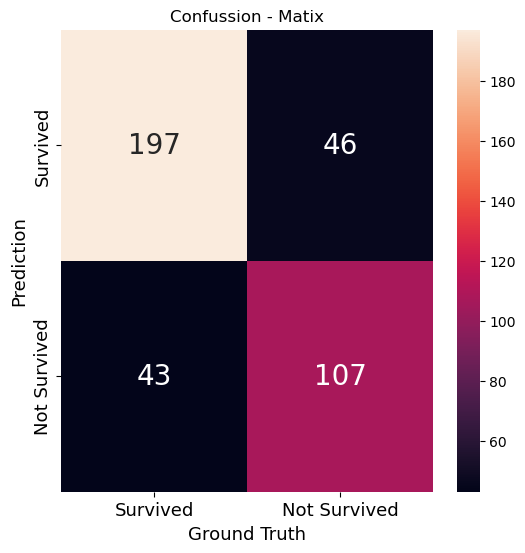

In [20]:
LogReg = make_n_train_model(LogisticRegression(),X_train, X_test, y_train, y_test )

## KNeighborsClassifier

The Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       243
           1       0.67      0.71      0.69       150

    accuracy                           0.76       393
   macro avg       0.74      0.75      0.74       393
weighted avg       0.76      0.76      0.76       393
 
 

Train Accuracy :  0.8133187772925764 	 Train AUC :  0.7971479050984351
Test Accuracy :  0.7557251908396947 	 Test AUC :  0.7463374485596708 
 

Train Accuracy :  0.8133187772925764 	 Train AUC :  0.7971479050984351
Test Accuracy :  0.7557251908396947 	 Test AUC :  0.7463374485596708 
 



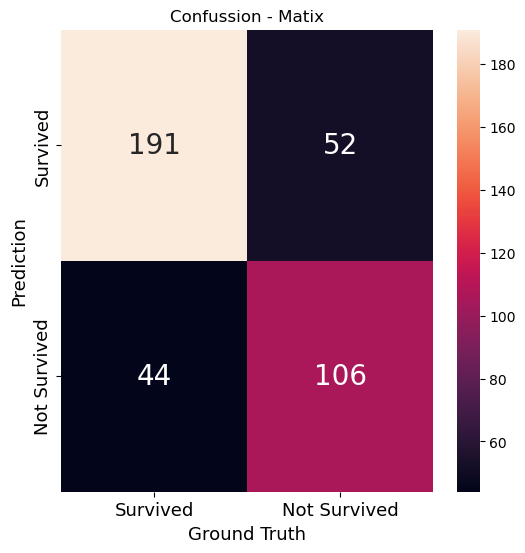

In [21]:
KNN = make_n_train_model(KNeighborsClassifier(),X_train, X_test, y_train, y_test )

## RandomForestClassifier

The Classification report : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       243
           1       0.74      0.62      0.67       150

    accuracy                           0.77       393
   macro avg       0.76      0.74      0.75       393
weighted avg       0.77      0.77      0.77       393
 
 

Train Accuracy :  0.8231441048034934 	 Train AUC :  0.7898334174659263
Test Accuracy :  0.7709923664122137 	 Test AUC :  0.7420987654320989 
 

Train Accuracy :  0.8231441048034934 	 Train AUC :  0.7898334174659263
Test Accuracy :  0.7709923664122137 	 Test AUC :  0.7420987654320989 
 



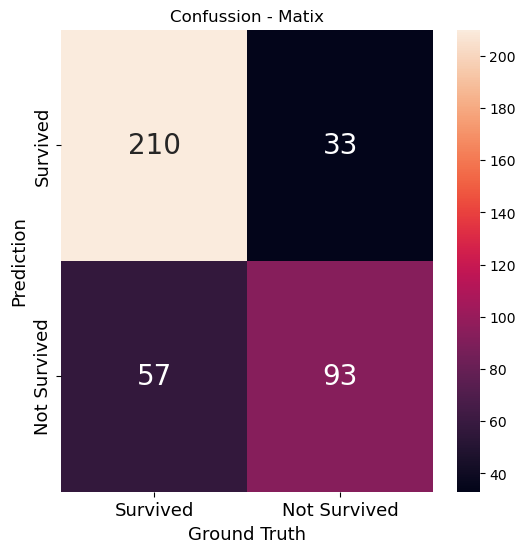

In [22]:
RandomForest = make_n_train_model(RandomForestClassifier(),X_train, X_test, y_train, y_test )

## BaggingClassifier

The Classification report : 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       243
           1       0.76      0.62      0.68       150

    accuracy                           0.78       393
   macro avg       0.77      0.75      0.76       393
weighted avg       0.78      0.78      0.77       393
 
 

Train Accuracy :  0.8231441048034934 	 Train AUC :  0.7865623422513883
Test Accuracy :  0.7786259541984732 	 Test AUC :  0.7482716049382717 
 

Train Accuracy :  0.8231441048034934 	 Train AUC :  0.7865623422513883
Test Accuracy :  0.7786259541984732 	 Test AUC :  0.7482716049382717 
 



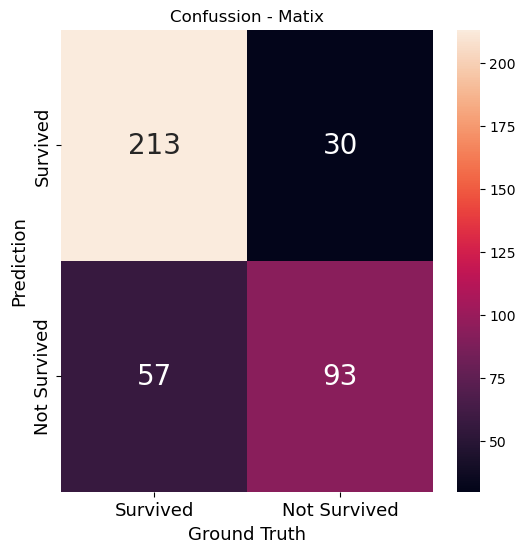

In [23]:
Bagging = make_n_train_model(BaggingClassifier(),X_train, X_test, y_train, y_test )

The best model here is **LogisticRegression** which a AUC of **76.2%**.

# Model save

In [24]:
import joblib
joblib.dump(LogReg,"our_best_model")

['our_best_model']